<a href="https://colab.research.google.com/github/AV-Gorshkov/Python_netology/blob/main/PY_Spark_(%D1%87%D0%B0%D1%81%D1%82%D1%8C_1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Установка PySpark

In [ ]:
!apt-get update

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:6 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Fetched 229 kB in 1s (169 kB/s)
Reading package lists... Done


In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [ ]:
!wget -q https://downloads.apache.org/spark/spark-3.4.2/spark-3.4.2-bin-hadoop3.tgz

In [ ]:
!tar -xvf spark-3.4.2-bin-hadoop3.tgz

spark-3.4.2-bin-hadoop3/
spark-3.4.2-bin-hadoop3/R/
spark-3.4.2-bin-hadoop3/R/lib/
spark-3.4.2-bin-hadoop3/R/lib/sparkr.zip
spark-3.4.2-bin-hadoop3/R/lib/SparkR/
spark-3.4.2-bin-hadoop3/R/lib/SparkR/html/
spark-3.4.2-bin-hadoop3/R/lib/SparkR/html/R.css
spark-3.4.2-bin-hadoop3/R/lib/SparkR/html/00Index.html
spark-3.4.2-bin-hadoop3/R/lib/SparkR/INDEX
spark-3.4.2-bin-hadoop3/R/lib/SparkR/worker/
spark-3.4.2-bin-hadoop3/R/lib/SparkR/worker/worker.R
spark-3.4.2-bin-hadoop3/R/lib/SparkR/worker/daemon.R
spark-3.4.2-bin-hadoop3/R/lib/SparkR/tests/
spark-3.4.2-bin-hadoop3/R/lib/SparkR/tests/testthat/
spark-3.4.2-bin-hadoop3/R/lib/SparkR/tests/testthat/test_basic.R
spark-3.4.2-bin-hadoop3/R/lib/SparkR/profile/
spark-3.4.2-bin-hadoop3/R/lib/SparkR/profile/shell.R
spark-3.4.2-bin-hadoop3/R/lib/SparkR/profile/general.R
spark-3.4.2-bin-hadoop3/R/lib/SparkR/doc/
spark-3.4.2-bin-hadoop3/R/lib/SparkR/doc/index.html
spark-3.4.2-bin-hadoop3/R/lib/SparkR/doc/sparkr-vignettes.html
spark-3.4.2-bin-hadoop3/R

In [ ]:
!pip install -q findspark

In [ ]:
# импорт библиотек

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive/')

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.4.2-bin-hadoop3"

import findspark
findspark.init()
from pyspark.sql import SparkSession
from pyspark.sql.functions import min, max, avg, sum, count
from pyspark.sql.functions import when

spark = SparkSession.builder.master("local[*]").getOrCreate()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## Загрузите данные при помощи spark.read.csv из приложенного файла

In [ ]:
# загружаем данные из файла iris.csv

param = r'/content/drive/My Drive/Нетология/Аналитика_Big_Data/дз_Spark/'
file = 'iris.CSV'

df_iris = spark.read.csv(f'{param}{file}', inferSchema=True, header=True)

df_iris.take(7)

[Row(sepal_length=5.1, sepal_width=3.5, petal_length=1.4, petal_width=0.2, variety='Setosa', variety_num=0),
 Row(sepal_length=4.9, sepal_width=3.0, petal_length=1.4, petal_width=0.2, variety='Setosa', variety_num=0),
 Row(sepal_length=4.7, sepal_width=3.2, petal_length=1.3, petal_width=0.2, variety='Setosa', variety_num=0),
 Row(sepal_length=4.6, sepal_width=3.1, petal_length=1.5, petal_width=0.2, variety='Setosa', variety_num=0),
 Row(sepal_length=5.0, sepal_width=3.6, petal_length=1.4, petal_width=0.2, variety='Setosa', variety_num=0),
 Row(sepal_length=5.4, sepal_width=3.9, petal_length=1.7, petal_width=0.4, variety='Setosa', variety_num=0),
 Row(sepal_length=4.6, sepal_width=3.4, petal_length=1.4, petal_width=0.3, variety='Setosa', variety_num=0)]

In [ ]:
df_iris.show(7)

+------------+-----------+------------+-----------+-------+-----------+
|sepal_length|sepal_width|petal_length|petal_width|variety|variety_num|
+------------+-----------+------------+-----------+-------+-----------+
|         5.1|        3.5|         1.4|        0.2| Setosa|          0|
|         4.9|        3.0|         1.4|        0.2| Setosa|          0|
|         4.7|        3.2|         1.3|        0.2| Setosa|          0|
|         4.6|        3.1|         1.5|        0.2| Setosa|          0|
|         5.0|        3.6|         1.4|        0.2| Setosa|          0|
|         5.4|        3.9|         1.7|        0.4| Setosa|          0|
|         4.6|        3.4|         1.4|        0.3| Setosa|          0|
+------------+-----------+------------+-----------+-------+-----------+
only showing top 7 rows



In [ ]:
# статистики и описание датафрейма
df_iris.describe().show()

+-------+------------------+-------------------+------------------+------------------+---------+------------------+
|summary|      sepal_length|        sepal_width|      petal_length|       petal_width|  variety|       variety_num|
+-------+------------------+-------------------+------------------+------------------+---------+------------------+
|  count|               150|                150|               150|               150|      150|               150|
|   mean| 5.843333333333335|  3.057333333333334|3.7580000000000027| 1.199333333333334|     null|               1.0|
| stddev|0.8280661279778637|0.43586628493669793|1.7652982332594662|0.7622376689603467|     null|0.8192319205190406|
|    min|               4.3|                2.0|               1.0|               0.1|   Setosa|                 0|
|    max|               7.9|                4.4|               6.9|               2.5|Virginica|                 2|
+-------+------------------+-------------------+------------------+-----

In [ ]:
df_iris.dtypes

[('sepal_length', 'double'),
 ('sepal_width', 'double'),
 ('petal_length', 'double'),
 ('petal_width', 'double'),
 ('variety', 'string'),
 ('variety_num', 'int')]

## Воспользуйтесь командами groupBy, max, min и avg, чтобы вывести максимальное минимальное и среднее значние каждого из аттрбутов цветка ('sepal_length','sepal_width','petal_length','petal_width')

In [ ]:
df_variety =  df_iris.groupBy('variety').agg( min('sepal_length'), max('sepal_length'), avg('sepal_length'), \
                                              min('sepal_width'), max('sepal_width'), avg('sepal_width'), \
                                              min('petal_length'), max('petal_length'), avg('petal_length'), \
                                              min('petal_width'), max('petal_width'), avg('petal_width') \
                                             )

df_variety.show()

+----------+-----------------+-----------------+-----------------+----------------+----------------+------------------+-----------------+-----------------+------------------+----------------+----------------+------------------+
|   variety|min(sepal_length)|max(sepal_length)|avg(sepal_length)|min(sepal_width)|max(sepal_width)|  avg(sepal_width)|min(petal_length)|max(petal_length)| avg(petal_length)|min(petal_width)|max(petal_width)|  avg(petal_width)|
+----------+-----------------+-----------------+-----------------+----------------+----------------+------------------+-----------------+-----------------+------------------+----------------+----------------+------------------+
| Virginica|              4.9|              7.9|6.587999999999998|             2.2|             3.8|2.9739999999999998|              4.5|              6.9|             5.552|             1.4|             2.5|             2.026|
|    Setosa|              4.3|              5.8|5.005999999999999|             2.3|     

In [ ]:
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)

<ipython-input-149-c60ffa4bead4>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


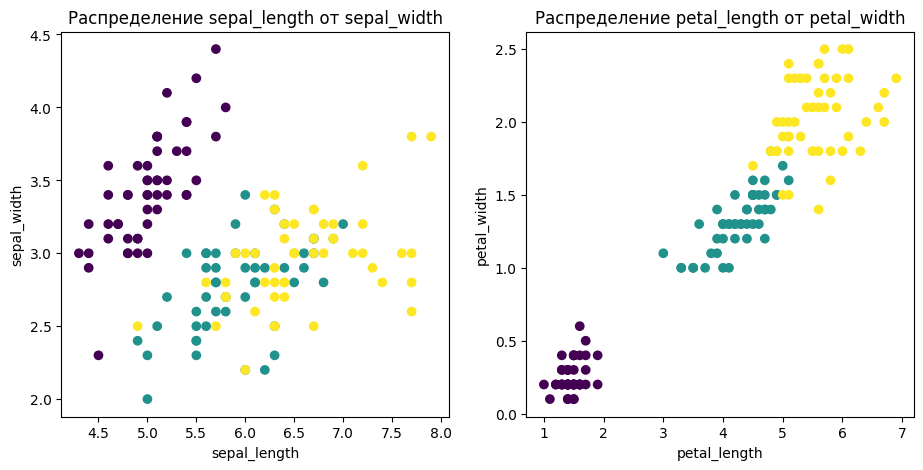

In [ ]:
# визуализация признаков цветков

fig = plt.subplots(figsize=(11,5))

plt.subplot(1,2,1)
plt.scatter(df_iris[['sepal_length']].collect(), df_iris[['sepal_width']].collect(), c=df_iris[['variety_num']].collect())
plt.title("Распределение sepal_length от sepal_width")
plt.xlabel("sepal_length")
plt.ylabel("sepal_width")


plt.subplot(1,2,2)
plt.scatter(df_iris[['petal_length']].collect(), df_iris[['petal_width']].collect(), c=df_iris[['variety_num']].collect())
plt.title("Распределение petal_length от petal_width")
plt.xlabel("petal_length")
plt.ylabel("petal_width")

plt.show()

## Посмотрите внимательно на получившийся график и сформируйте правило вида ЕСЛИ ЗНАЧЕНИЕ ПАРАМЕТРА A < ЗНАЧЕНИЕ, ТО IRIS ОТНОСИТСЯ К КЛАССУ SETOSA - ИНАЧЕ К КАКОМУ-ТО ДРУГОМУ (НАЗОВЕМ, ЕГО НАПРИМЕР UNKNOWN)
## При помощи команд withColumn, when, otherwise создайте в датафрейме новую колонку с таким предсказанием

In [ ]:
df_iris=df_iris.withColumn('prediction', when( df_iris['petal_length'] < 2.5, 'Setosa').otherwise('Unknown'))

df_iris.show()

+------------+-----------+------------+-----------+-------+-----------+----------+
|sepal_length|sepal_width|petal_length|petal_width|variety|variety_num|prediction|
+------------+-----------+------------+-----------+-------+-----------+----------+
|         5.1|        3.5|         1.4|        0.2| Setosa|          0|    Setosa|
|         4.9|        3.0|         1.4|        0.2| Setosa|          0|    Setosa|
|         4.7|        3.2|         1.3|        0.2| Setosa|          0|    Setosa|
|         4.6|        3.1|         1.5|        0.2| Setosa|          0|    Setosa|
|         5.0|        3.6|         1.4|        0.2| Setosa|          0|    Setosa|
|         5.4|        3.9|         1.7|        0.4| Setosa|          0|    Setosa|
|         4.6|        3.4|         1.4|        0.3| Setosa|          0|    Setosa|
|         5.0|        3.4|         1.5|        0.2| Setosa|          0|    Setosa|
|         4.4|        2.9|         1.4|        0.2| Setosa|          0|    Setosa|
|   

## Проверьте качество своего предсказания
Для этого:
1. Подсчитайте количество строк, где Вы предсказали класс Setosa и правильный класс был так же Setosa
2. Подсчитайте количество строк, где Вы предскзали класс Setosa, а правильный класс был какой-то другой (воспользуйтесь оператором "не равно" - !=)

In [ ]:
# подсчет кол-ва правильных предсказаний

df_filter_1 = df_iris.where((df_iris['prediction'] == 'Setosa') & (df_iris['variety'] == 'Setosa') )

df_filter_1.show(7)
df_filter_1.count()

+------------+-----------+------------+-----------+-------+-----------+----------+
|sepal_length|sepal_width|petal_length|petal_width|variety|variety_num|prediction|
+------------+-----------+------------+-----------+-------+-----------+----------+
|         5.1|        3.5|         1.4|        0.2| Setosa|          0|    Setosa|
|         4.9|        3.0|         1.4|        0.2| Setosa|          0|    Setosa|
|         4.7|        3.2|         1.3|        0.2| Setosa|          0|    Setosa|
|         4.6|        3.1|         1.5|        0.2| Setosa|          0|    Setosa|
|         5.0|        3.6|         1.4|        0.2| Setosa|          0|    Setosa|
|         5.4|        3.9|         1.7|        0.4| Setosa|          0|    Setosa|
|         4.6|        3.4|         1.4|        0.3| Setosa|          0|    Setosa|
+------------+-----------+------------+-----------+-------+-----------+----------+
only showing top 7 rows



50

In [ ]:
# подсчет кол-ва не правильных предсказаний

df_filter_1 = df_iris.where( (df_iris['prediction'] != 'Setosa') & (df_iris['variety'] == 'Setosa') )

df_filter_1.show(7)
df_filter_1.count()

+------------+-----------+------------+-----------+-------+-----------+----------+
|sepal_length|sepal_width|petal_length|petal_width|variety|variety_num|prediction|
+------------+-----------+------------+-----------+-------+-----------+----------+
+------------+-----------+------------+-----------+-------+-----------+----------+



0

In [ ]:
# cохраненим данные в файл

df_iris.write.format('com.databricks.spark.csv').option('header', 'true').save('DF_IRIS.csv')